In [1]:
####%%%%%!pip install autograd
########!pip install tensorflow

In [2]:
import tensorflow as tf
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
nx = 11
Tfinal=1
dx = Tfinal / (nx-1)

In [4]:
###psy' = -psy*A(x)+B(x)
# def A(x):
#     '''Left part of initial equation    '''
#     return x + (1. + 3.*x**2) / (1. + x + x**3)
# def B(x):
#     '''Right part of initial equation'''
#     return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))
# def f(x, psy):
#     '''d(psy)/dx = f(x, psy)This is f() function on the right'''
#     return B(x) - psy * A(x)
# def psy_analytic(x):
#     ''' Analytical solution of current problem'''
#     return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2
# IC =1.

In [5]:
# IC =100.
# def A(x):
#     '''Left part of initial equation    '''
#     return 10.
# def B(x):
#     '''Right part of initial equation'''
#     return 0.
# def f(x, psy):
#     '''d(psy)/dx = f(x, psy)This is f() function on the right'''
#     return B(x) - psy * A(x)
# def psy_analytic(x):
#     ''' Analytical solution of current problem'''
#     return np.exp(-10*x)*IC

In [6]:
def A(x):
    '''Left part of initial equation    '''
    return 1/5.
def B(x):
    '''Right part of initial equation'''
    return np.exp(-x/5)*np.cos(x)
def f(x, psy):
    '''d(psy)/dx = f(x, psy)This is f() function on the right'''
    return np.exp(-x/5)*np.cos(x) - psy /5.
def psy_analytic(x):
    ''' Analytical solution of current problem'''
    return np.exp(-x/5)*np.sin(x) 
IC = 0.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 0.1


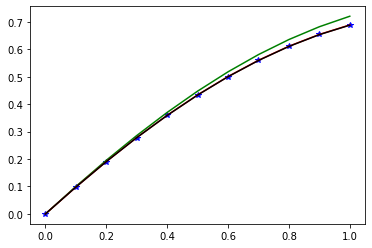

In [7]:
x_space = np.linspace(0, Tfinal, nx)    
y_space = psy_analytic(x_space)
print(x_space,dx)
# psy_fd = np.zeros_like(y_space)
# psy_fd[0] = 1. # IC
psy_fd1 = np.zeros_like(y_space)
psy_fd1[0] = IC # IC
psy_fd2 = np.zeros_like(y_space)
psy_fd2[0] = IC # IC
psy_fd3 = np.zeros_like(y_space)
psy_fd3[0] = IC 
psy_fdd = np.zeros_like(y_space)

### first order
# for i in range(1, len(x_space)):
#     psy_fd[i] = psy_fd[i-1] + B(x_space[i]) * dx - psy_fd[i-1] * A(x_space[i]) * dx
n=1
for i in range(1, len(x_space)):
    #psy_fd1[i] = psy_fd1[i-1] + B(x_space[i-1]) * dx - psy_fd1[i-1] * A(x_space[i-1]) * dx
    psy_fd1[i] = psy_fd1[i-1]  + dx*f(x_space[i-1],psy_fd1[i-1])
    #psy_fd1[i] = psy_fd1[i-1]/(1+dx*A(x_space[i-1]))
###  2nd order
# n=2
for i in range(1, len(x_space)):
    psy_fd2[i] = psy_fd2[i-1] + dx*f(x_space[i-1]+dx/2, psy_fd2[i-1]+dx*f(x_space[i-1],psy_fd2[i-1])/2)
    
for i in range(1, len(x_space)):
    psy_fdd[i] = psy_fd3[i-1]  + dx*f(x_space[i-1],psy_fd3[i-1])
    psy_fd3[i] = psy_fd3[i-1] + dx*(f(x_space[i-1],psy_fd3[i-1])+f(x_space[i],psy_fdd[i]))/2
psy_fd = psy_fd1
plt.figure()
plt.plot(x_space, y_space, 'b*')
plt.plot(x_space, psy_fd1, 'g')
plt.plot(x_space, psy_fd2, 'r')
plt.plot(x_space, psy_fd3, 'k')
plt.show()

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))

def loss_function(W, x, yhat):
    loss_sum = 0
    for i in range(0,len(x)):
        net_out = neural_network(W, x[i])[0][0]
        psy_t = yhat[i] +  x[i]**(n+1)*net_out
        #print(net_out)
        #psy_t = yhat[i] +  x[i]*net_out
        d_net_out = d_neural_network_dx(W, x[i])[0][0]
        d_psy_t = f(x[i],yhat[i])+ (n+1)*(x[i]**n)*net_out + x[i]**(n+1)* d_net_out
        #d_psy_t = f(x[i],yhat[i])+ net_out+x[i]*d_net_out
        func = f(x[i], psy_t)
        err_sqr = (d_psy_t - func)**2
        loss_sum += err_sqr
    return loss_sum


In [9]:
import time
# import resource 

time_start = time.perf_counter()
# insert code here ...
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

# x = np.array(1)
# print neural_network(W, x)
# print d_neural_network_dx(W, x)

for i in range(5000):
    loss_grad =  grad(loss_function)(W, x_space,psy_fd)
    #loss_grad =  grad(loss_function)(W, x_space, y_space)
   # tf.print(W[0].shape)
   # print(loss_grad[0].shape, loss_grad[1].shape)
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    if loss_function(W, x_space, psy_fd) < 0.01:
        break
    
   # print(loss_function(W, x_space,psy_fd))
   
time_elapsed = (time.perf_counter() - time_start)
# memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("%i range, %5.1f secs" % (i+1, time_elapsed))
# print ("%5.1f secs %5.1f MByte" % (time_elapsed,memMb))

1604 range,  36.2 secs


[array([0.08624025]), array([0.08005039]), array([0.07358625]), array([0.06660942]), array([0.05894577]), array([0.0505012]), array([0.04126336]), array([0.0312917]), array([0.02069999]), array([0.009636]), array([-0.0017377])]


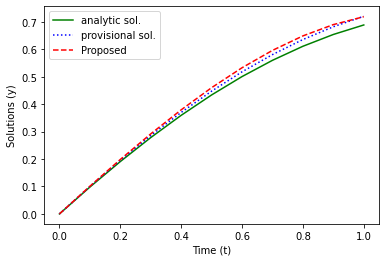

In [10]:
# tf.print(loss_function(W, x_space,psy_fd))
res =  psy_fd + [xi**(n+1)*neural_network(W, xi)[0][0] for xi in x_space]

aa= [neural_network(W, xi)[0] for xi in x_space]
print(aa)
beingsaved = plt.figure()
plt.plot(x_space, y_space, 'g-',label='analytic sol.') 
plt.plot(x_space, psy_fd, 'b:',label='provisional sol.')
plt.plot(x_space, res, 'r--',label='Proposed')
plt.xlabel('Time (t)')
plt.ylabel('Solutions (y)')
#plt.yscale("log")
plt.legend()
plt.show()
#beingsaved.savefig('test3comp.eps', format='eps', dpi=1000)

In [11]:
print(np.linalg.norm(y_space - res))
print(np.linalg.norm(y_space - psy_fd))

0.08558463587662485
0.05942444747896128


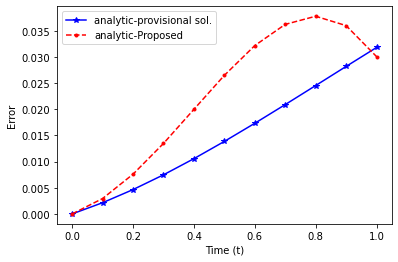

In [12]:
beingsaved1 = plt.figure()
plt.plot(x_space, abs(y_space-psy_fd), 'b*-',label='analytic-provisional sol.') 
plt.plot(x_space, abs(y_space-res), 'r.--',label='analytic-Proposed')
#plt.plot(x_space[1:], abs(y_space[1:]-psy_fd[1:]), 'b*-',label='analytic-provisional sol.') 
#plt.plot(x_space[1:], abs(y_space[1:]-res[1:]), 'r.--',label='analytic-Proposed')
plt.xlabel('Time (t)')
plt.ylabel('Error')
#plt.yscale("log")
plt.legend()
plt.show()
#beingsaved1.savefig('test3err.eps', format='eps', dpi=1000)

In [13]:
#print(y_space[1:]-psy_fd[1:])